# CASE STUDY:: HEART DISEASE PREDICTION

### Background

Peterside Hospital is a private hospital with a lot of patients from both genders and of all ages. It is located in Nigeria and has a major challenge dimacating features of heart problems and the possible cause of it. Heart disease is a major health issue that can occur in people of any age. Although Peterside hospital is ranked high, it has to update its healthcheck technology if it must remian in the market with average or above average competitive power. 

### Objective

The objective of this case study is to help Peterside hospital, a private hospital, develop a machine learning model that can accurately predict the presence of heart problems in patients based on its features, such chest_pain_type, resting_blood_pressure, cholesterol, fasting_blood_sugar etc.

### Data

The data used in this case study is a publicly available dataset from Kaggle, which contains information on patients registered in a hospital, including their health check-up readings such as, cholesterol, heart pressure, blood sugar and others. The dataset contains over 303 records and 14 variables/features.

### Methodology

The methodology used in this case study involves the following steps:

Data cleaning and preprocessing: The first step is to clean and preprocess the data, including handling missing values, removing outliers, and transforming variables as necessary.

Exploratory data analysis: Next, we will perform exploratory data analysis to gain insights into the data, such as identifying trends and patterns, and identifying correlations between variables.

Feature engineering: Based on the insights gained from the exploratory data analysis, we will perform feature engineering to select the most relevant features for predicting heart disease and transform them as necessary.

Model selection and training: We will then select a suitable machine learning algorithm for predicting heart diseases, such as logistic regression, a decision tree, and other model will be trained on the preprocessed data.

Model evaluation and fine-tuning: We will evaluate the performance of each model using various metrics, such as accuracy, precision, recall score and others.

The best model will be selected and recmmended for use.

In [39]:
#For data analysis
import pandas as pd
import numpy as np

#For visualisatio
import matplotlib.pyplot as plt
import seaborn as sns

#For Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler #To normalise data bet 0 and 1

#Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#!pip instal xgboost
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

########
import missingno as msno
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# DATA LOADING

In [3]:
df = pd.read_csv(r'C:\Users\oguad\Desktop\10ANALYTICS DATA SCIENCE\VIDEOS\Supervised ML\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Features in the dataset and meaning:

The heart CSV dataset contains 303 records and 14 columns, including the target variable. The features include:

- age (age in years) 
- sex (1=male, 0=female) 
- cp (chest pain type= 1: typical agina; 2: atypical agina; 3: non-agina pain; 4: asymptomatic) 
- trestbps (resting blood pressure; in mm Hg admission to the hospital)
- chol (serum cholesterol in mg/dl) 
- fbs (fasting blood sugar>120mg/dl)(1 = true; 0 = false) 
- resteccg (resting electrocardiographic results)
- Thalach (maximum heart rate achieved) 
- exang (exercise-induced angina; 1 = yes; 0 = no) )
- oldpeak (ST depression induced by exercise relative to rest) 
- slope (the slope of the peak exercise ST segment)
- ca (number of major vessels (0-3) colored by flourosopy)
- thal (thalassemia; 3=normal; 6=fixed defect; 7=reversable defect)
- target (have disease or not (1=yes, 0=no)

In [4]:
#Some original columns renamed
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
'exercise_induced_angina', 'st_depression', 'st_slope', 'nu_major_vessels', 'thalassemia', 'target']
      
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,nu_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  nu_major_vessels         303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [6]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,nu_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
nu_major_vessels           0
thalassemia                0
target                     0
dtype: int64


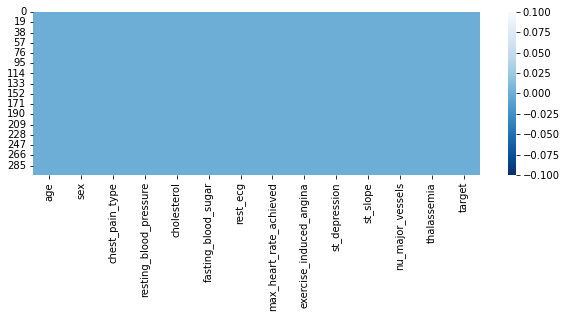

In [7]:
print(df.isnull().sum())

plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r");

# EXPLORATORY DATA ANALYSIS

# Univariate Analysis

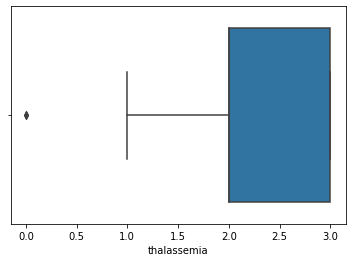

In [8]:
sns.boxplot(x=df["thalassemia"]);

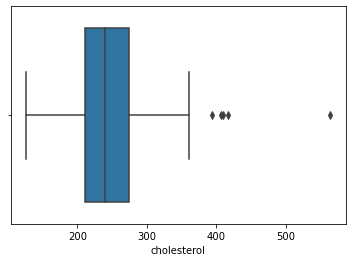

In [9]:
sns.boxplot(x=df["cholesterol"]);

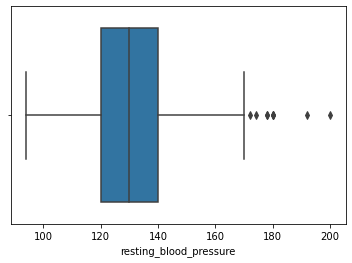

In [10]:
sns.boxplot(x=df["resting_blood_pressure"]);

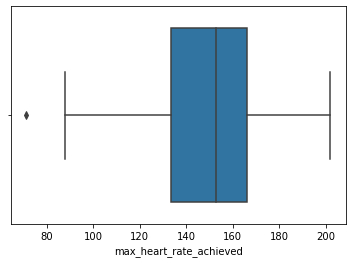

In [11]:
sns.boxplot(x=df['max_heart_rate_achieved']);

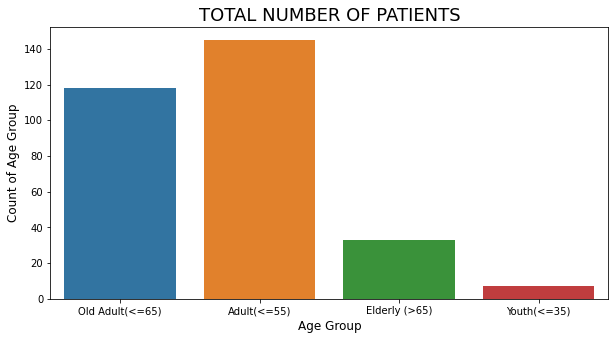

In [12]:
#Data visualisation
#Age_bracket
def age_bracket(age):
    if age<=35:
        return "Youth(<=35)"
    elif age <=55:
        return"Adult(<=55)"
    elif age <=65:
        return "Old Adult(<=65)"
    else:
        return "Elderly (>65)"
   

df['age_bracket']=df['age'].apply(age_bracket)

#Investigating the age group of patients
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count of Age Group', fontsize=12)
plt.title('TOTAL NUMBER OF PATIENTS', fontsize=18);

Patients are mostly adults

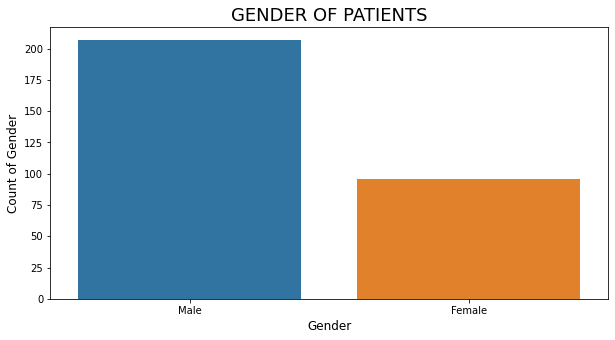

In [13]:
#Data visualisation
#Sex
def gender(sex):
    if sex==1:
        return "Male"
    else:
        return "Female"
   

df['gender']=df['sex'].apply(gender)

#Investigating the gender of patients
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count of Gender', fontsize=12)
plt.title('GENDER OF PATIENTS', fontsize=18);

Male gender make up for most of the patients in this hospital

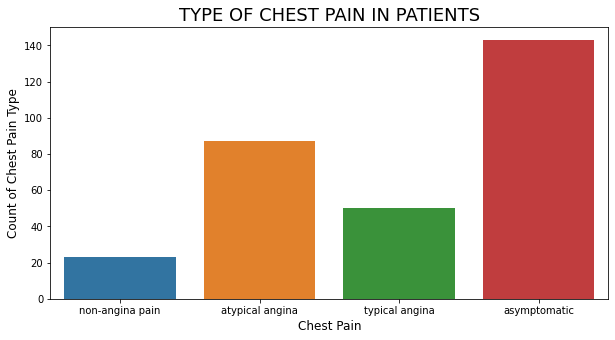

In [14]:
#Data visualisation
#Chest pain type (chest pain type= 1: typical agina; 2: atypical agina; 3: non-agina pain; 4: asymptomatic) 
def chest_pain(cp):
    if cp==1:
        return "typical angina"
    elif cp==2:
        return"atypical angina"
    elif cp==3:
        return "non-angina pain"
    else:
        return "asymptomatic"
   

df['chest_pain']=df['chest_pain_type'].apply(chest_pain)

#Investigating the chest pain type of patients
plt.figure(figsize=(10,5))
sns.countplot(x='chest_pain', data=df)
plt.xlabel('Chest Pain', fontsize=12)
plt.ylabel('Count of Chest Pain Type', fontsize=12)
plt.title('TYPE OF CHEST PAIN IN PATIENTS', fontsize=18);

Majority of the patients are asymptomatics followed by patients with atypical angina.

yes    165
no     138
Name: label, dtype: int64


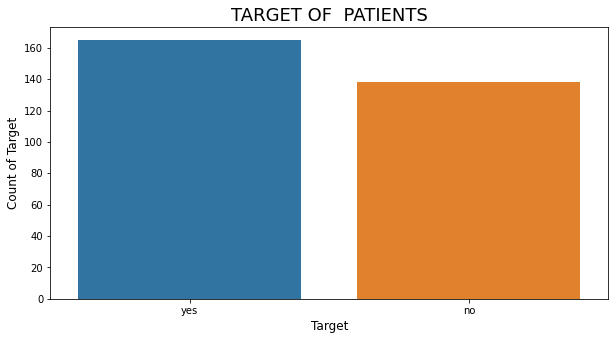

In [15]:
#Data visualisation
#Target (Have disease or not (1=yes; 0=no)) 
def label(tg):
    if tg==1:
        return "yes"
    else:
        return "no"
   
df['label']=df['target'].apply(label)

#To see the target count
print(df['label'].value_counts())


#Investigating the total number in each target category of patients
plt.figure(figsize=(10,5))
sns.countplot(x='label', data=df)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Count of Target', fontsize=12)
plt.title('TARGET OF  PATIENTS', fontsize=18);

Majority of the patients have diseases because of the high "yes" taget value from the chart.

# Bivariate Analysis

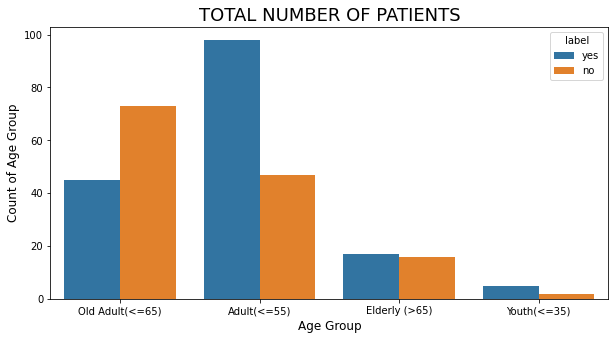

In [16]:
#Investigating the age group of patients. 
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df, hue='label')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count of Age Group', fontsize=12)
plt.title('TOTAL NUMBER OF PATIENTS', fontsize=18);

Here we compared the two variables which are the age bracket versus label. It is observed that majority of Old Adults less than or equal to 65 years have lesser heart problems compared to Adults of less that or equalt to 55 years of age. This result is surprising because it is expected that the older you the more prone you are to heart disease. 

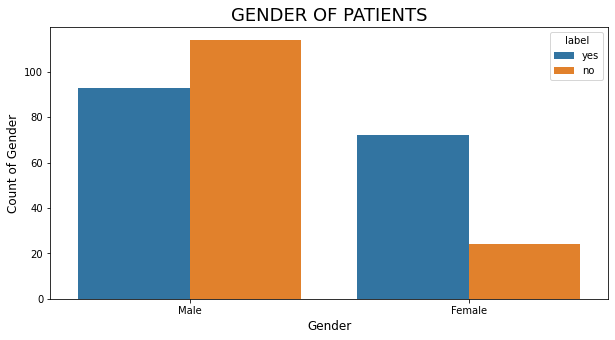

In [17]:
#Investigating the gender of patients. 
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df, hue='label')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count of Gender', fontsize=12)
plt.title('GENDER OF PATIENTS', fontsize=18);

Although in proportion, male gender has the highest heart disease count, statistically, the female gender shows more susciptibility to heart issues.

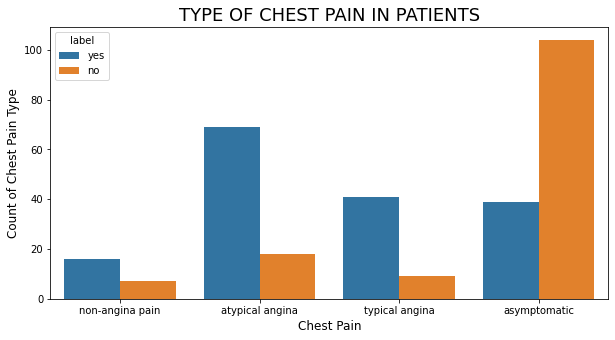

In [18]:
#Investigating the chest pain type of patients
plt.figure(figsize=(10,5))
sns.countplot(x='chest_pain', data=df, hue='label')
plt.xlabel('Chest Pain', fontsize=12)
plt.ylabel('Count of Chest Pain Type', fontsize=12)
plt.title('TYPE OF CHEST PAIN IN PATIENTS', fontsize=18);

While a large number of the patients at Peterside hospital are showing signs and symptoms of heart disease, another majority of the patients have been diagnosed with atypical angina and typical angina. 

# Multivariate  Analysis

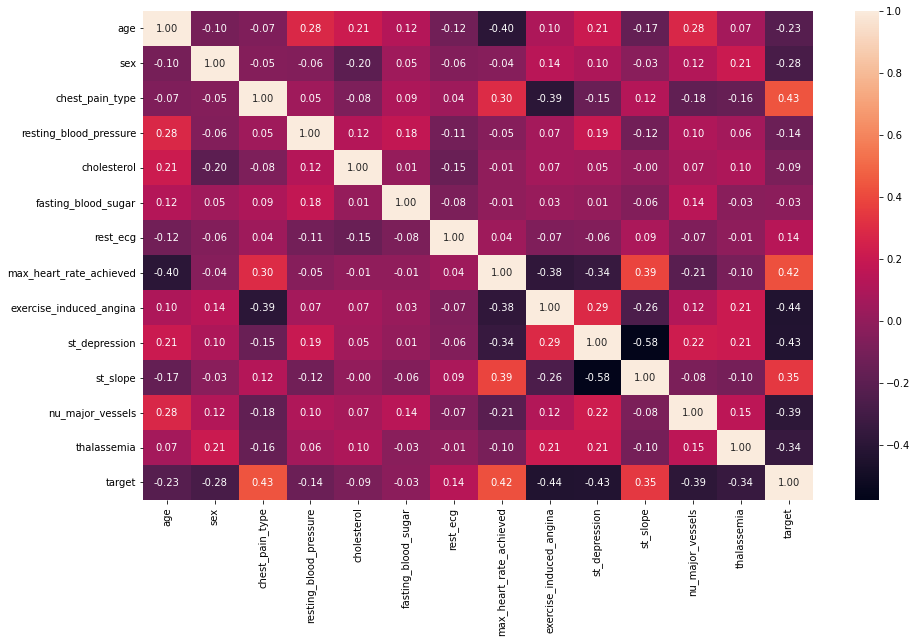

In [19]:
#Correlation analysis
plt.figure(figsize=(15,9))

hm = sns.heatmap(df.corr(), cbar=True, annot=True, fmt='.2f',
                annot_kws={'size':10})

With the heatmap we were able to answer a key question "Are there relationships between the target variable and the features of heart disease? Which of the variables/features has positive and which has negative relaship with the target?

Age, sex, resting blood pressure, fasting blood sugar, depression and thalassmenia have a negative relashionship with the target. While features such as chest pain type, max. heart rate achieved, cholesterol, exsercise induced angina and st slope have positive relationships with the target. This is to say that any patients who shows sypmtoms of the positive features stands the risk of a future heart disease if they don't already have it. 

# Future Engineering/Data Preprocessing

In [20]:
df.head()

df1 = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
'exercise_induced_angina', 'st_depression', 'st_slope', 'nu_major_vessels', 'thalassemia']]

label = df[['target']]

In [21]:
#Normalise the data
scaler = MinMaxScaler()

df1["Scaled_RBP"] = scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1, 1))
df1["Scaled_chol"] = scaler.fit_transform(df1[['cholesterol']].values.reshape(-1, 1))
df1["Scaled_thal"] = scaler.fit_transform(df1[['thalassemia']].values.reshape(-1, 1))
df1["Scaled_max_heart_rate"] = scaler.fit_transform(df1['max_heart_rate_achieved'].values.reshape(-1, 1))

#Drop the unscaled colums that have been scaled
df1.drop(['resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'thalassemia'], axis=1, inplace=True)

df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,nu_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


# Machine Learning

In [22]:
X_train,X_test,y_train,y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [23]:
X_train.head(3)

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,nu_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153


In [24]:
#Model building

#Logistic regression

lr = LogisticRegression()

lr.fit(X_train, y_train)

ly_pred = lr.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8360655737704918
Precision: 0.8666666666666667
Recall: 0.8125
F1-score: 0.8387096774193549
AUC-ROC: 0.8372844827586207


In [25]:
ly_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [26]:
y_test.head(10)

,target
179,0
228,0
111,1
246,0
60,1
9,1
119,1
223,0
268,0
33,1


NARATION: This classification model using linear regression algorithm shows that:
- The model has correctly predicted the outcome for approximately 83.6% of the samples.
- The model correctly identified around 86.7% of the positive samples out of all the predicted positive samples.
- This recall value (0.8125) indicates that the model has captured approximately 81.25% of the actual positive samples.
- From the results, the F1-score is 0.8387096774193549, indicating a reasonable balance between precision and recall.
- An AUC-ROC value closer to 1 indicates better performance. In this case, the AUC-ROC is 0.8372844827586207, suggesting the model has good discriminatory power.

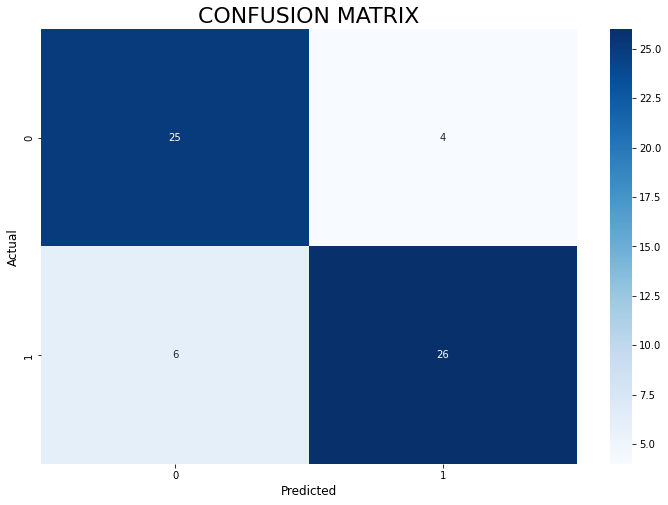

In [27]:
#Creating a confusion metrix. 
lcm = confusion_matrix(y_test, ly_pred)

#Visualize the confsion matrix
plt.figure(figsize=(12,8))
sns.heatmap(lcm, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('CONFUSION MATRIX', fontsize=22)
plt.show()

NARRATION: 

25 patients were accuratly diagnosed without heart disease. 6 patients were wrongly predicted not to have heart diseases. 4 other patients without heart problem have been wrongly diagnosed of hearst diseases. 26 more patients were accurately diagnosed with heart problems.  

In [28]:
#Model building
#Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Logistic Regression
Accuracy: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375
F1-score: 0.84375
AUC-ROC: 0.8356681034482758


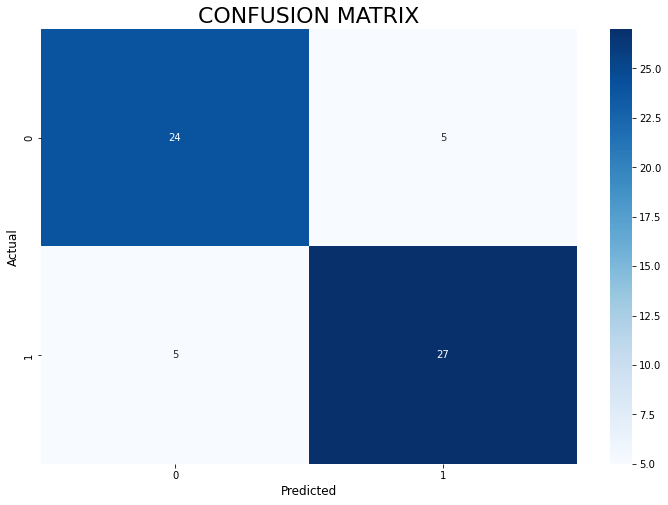

In [29]:
#Creating a confusion metrix. 
rfc = confusion_matrix(y_test, rfy_pred)

#Visualize the random forest classifier
plt.figure(figsize=(12,8))
sns.heatmap(rfc, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('CONFUSION MATRIX', fontsize=22)
plt.show()

NARRATION: 

24 patients were accuratly predicted not to have any heart disease. 5 patients were wrongly predicted not to have heart diseases while they for a fact have heart issues. 5 other patients without heart problem have been wrong confirmed of heart diseases. 27 more patients were accurately diagnosed with heart problems. This model performs better than the Logistic Regression Model.

In [59]:
#Model building
#Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
svy_pred = svc.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, svy_pred))
print("Precision:", precision_score(y_test, svy_pred))
print("Recall:", recall_score(y_test, svy_pred))
print("F1-score:", f1_score(y_test, svy_pred))
print("AUC-ROC:", roc_auc_score(y_test, svy_pred))

Logistic Regression
Accuracy: 0.6557377049180327
Precision: 0.6571428571428571
Recall: 0.71875
F1-score: 0.6865671641791045
AUC-ROC: 0.6524784482758621


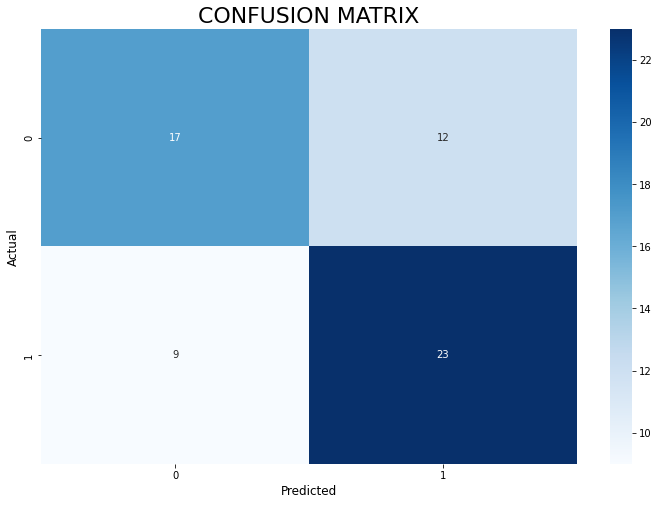

In [60]:
#Creating a confusion metrix. 
svc = confusion_matrix(y_test, svy_pred)

#Visualize the confsion matrix
plt.figure(figsize=(12,8))
sns.heatmap(svc, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('CONFUSION MATRIX', fontsize=22)
plt.show()

NARRATION: 

17 patients were accuratly predicted without heart disease. 9 patients were wrongly predicted not to have heart diseases but they have heart issues. 12 other patients without heart problem have been wrong confirmed with hearst diseases. 23 patients were accurately diagnosed with heart problems. This model performs worse than the Logistic Regression and Random Forest Model.

In [30]:
#Running several models! 

classifiers = [
    [DecisionTreeClassifier(), "Decision Tree"],
    [KNeighborsClassifier(), "K-Nearest Neighbors"],
    [SVC(), "Support Vector Machine"],
    [LogisticRegression(), "Logistic Regression"],
    [RandomForestClassifier(), "Random Forest"],
    [GaussianNB(), "Naive Bayes"],
    [GradientBoostingClassifier(),'Gradient Boosting Machine'],
    [XGBClassifier(), "XGBoost"],
    [SGDClassifier(), 'SGD Classifier']
    ]

In [40]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [41]:
acc_list

{'Decision Tree': ['77.05%'],
 'K-Nearest Neighbors': ['75.41%'],
 'Support Vector Machine': ['65.57%'],
 'Logistic Regression': ['83.61%'],
 'Random Forest': ['83.61%'],
 'Naive Bayes': ['86.89%'],
 'Gradient Boosting Machine': ['77.05%'],
 'XGBoost': ['83.61%'],
 'SGD Classifier': ['80.33%']}

In [42]:
print('Accuracy_Score')
sl = pd.DataFrame(acc_list)
sl.head()

Accuracy_Score


,Decision Tree,K-Nearest Neighbors,Support Vector Machine,Logistic Regression,Random Forest,Naive Bayes,Gradient Boosting Machine,XGBoost,SGD Classifier
0,77.05%,75.41%,65.57%,83.61%,83.61%,86.89%,77.05%,83.61%,80.33%


In [43]:
print('Precision_Score')
s2 = pd.DataFrame(precision_list)
s2.head()

Precision_Score


,Decision Tree,K-Nearest Neighbors,Support Vector Machine,Logistic Regression,Random Forest,Naive Bayes,Gradient Boosting Machine,XGBoost,SGD Classifier
0,84.62%,79.31%,65.71%,86.67%,84.38%,90.0%,80.0%,86.67%,88.46%


In [44]:
print('Recall_Score')
s3 = pd.DataFrame(recall_list)
s3.head()

Recall_Score


,Decision Tree,K-Nearest Neighbors,Support Vector Machine,Logistic Regression,Random Forest,Naive Bayes,Gradient Boosting Machine,XGBoost,SGD Classifier
0,68.75%,71.88%,71.88%,81.25%,84.38%,84.38%,75.0%,81.25%,71.88%


In [58]:
print('roc_Score')
s4 = pd.DataFrame(roc_list)
s4.head()

roc_Score


,Decision Tree,K-Nearest Neighbors,Support Vector Machine,Logistic Regression,Random Forest,Naive Bayes,Gradient Boosting Machine,XGBoost,SGD Classifier
0,77.48%,75.59%,65.25%,83.73%,83.57%,87.02%,77.16%,83.73%,80.77%


# Conclusion

Haven gone through the process of exploratory data analysis/analitic and building robost models(8 models) for heart disease prediction, one models stood out as the best model for current and future predictions. This model is the Naive Bayes model with general predictions of over 84% (for accuracy, precision, recall score nd roc score) and a total average of 87%.

The observations from this analsis show that patients with sings of chest pain type, maximum  heart rate achieved, cholesterol, exsercise induced angina and peak slope of exercise have potentials developing heart problems if they do not already have one. 